<a href="https://colab.research.google.com/github/albertomarin12/Simulac-n-matem-tica/blob/main/Tarea_Ajuste_de_curvas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea - Ajuste de curvas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [ ]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


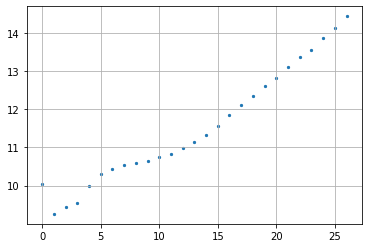

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 26, 27)
y = data

plt.figure()
plt.scatter(x,y, s =5)
plt.grid()

In [ ]:
import scipy.optimize as opt

In [ ]:
def fcost(beta, X, y) : # Beta es la el acompañante de las variables
    m, n = X.shape # m = muestras y n = numero de betas
    beta = np.reshape(beta, [n,1]) # 
    prediccion = X @ beta #multiplicacion de matrices donde se se crean todas las funciones
    error = prediccion - y #Distancia entre la funcion dada y los puntos
    return (error.T @ error)[0][0] # Distancia al cuadrado en multiplicacion de matrices

In [ ]:
m = len(y) # numero de muestras
ones = np.ones([m,1])
x1 = np.reshape(x, [m, 1])

X = np.hstack((ones, x1))

In [ ]:
beta_inicial = np.random.rand(2, 1)
beta_inicial

array([[0.65475195],
       [0.68719194]])

In [ ]:
y_vector = np.reshape(y, [m, 1])

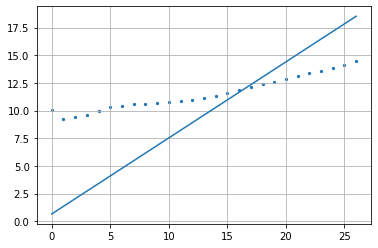

In [ ]:
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(x, X@beta_inicial)
plt.grid()

In [ ]:
fcost(beta_inicial, X, y_vector)

515.8294968238412

In [ ]:
sol = opt.minimize(fcost, beta_inicial, args=(X, y_vector))
sol

<ipython-input-52-59a536ad069e>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol = opt.minimize(fcost, beta_inicial, args=(X, y_vector))


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.3704889518169976
        x: [ 9.116e+00  1.867e-01]
      nit: 4
      jac: [ 3.815e-06  3.785e-06]
 hess_inv: [[ 7.011e-02 -3.968e-03]
            [-3.968e-03  3.053e-04]]
     nfev: 24
     njev: 8

In [ ]:
beta = np.reshape(sol.x, [2, 1])
beta

array([[9.11567658],
       [0.18667054]])

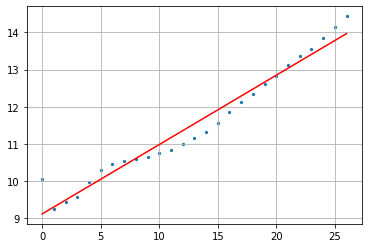

In [ ]:
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(x, X @ beta, "r")

plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [ ]:
import pandas as pd

archivo = 'population_data.csv'

df = pd.read_csv(archivo)
x = df['Year']
y = df['Poblacion']
nd = len(y)

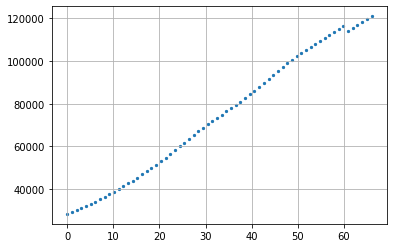

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, nd, nd)
y = y

plt.figure()
plt.scatter(x,y, s =5)
#plt.plot(x , 5 + 1*x, "r")
plt.grid()

In [ ]:
import scipy.optimize as opt

In [ ]:
def fcost(beta, X, y) : # Beta es la el acompañante de las variables
    m, n = X.shape # m = muestras y n = numero de betas
    beta = np.reshape(beta, [n,1]) # 
    prediccion = X @ beta #multiplicacion de matrices donde se se crean todas las funciones
    error = prediccion - y #Distancia entre la funcion dada y los puntos
    return (error.T @ error)[0][0] # Distancia al cuadrado en multiplicacion de matrices

In [ ]:
M = len(y) # numero de muestras
ones = np.ones([M,1])
x1 = np.reshape(x, [M, 1])

X = np.hstack((ones, x1))

In [ ]:
beta_inicial = np.random.rand(2, 1)
beta_inicial

array([[0.07792223],
       [0.50837486]])

In [ ]:
y

0      28296
1      29110
2      29980
3      30904
4      31880
       ...  
61    115683
62    117054
63    118395
64    119713
65    121005
Name: Poblacion, Length: 66, dtype: int64

In [ ]:
M

66

In [ ]:
N = len(y)
N

66

In [ ]:
y_vector = np.reshape(y, [M, 1])

ValueError: ignored